In [5]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [6]:
# cdc_csv = "Covid-19_Case_Surveillance_Public_Use_Data.csv"
# cdc_df = pd.read_csv(cdc_csv)

# cdc_df.head(2)

us_vac_csv = "Resource/us_state_vaccinations.csv"
us_vac_df = pd.read_csv(us_vac_csv)
us_vac_df.head(2)

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.44,7.69,NaN,NaN,NaN,0.207
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.52,7.73,5906.0,5906.0,1205.0,0.222


In [7]:
us_vac_df.columns

Index(['date', 'location', 'total_vaccinations', 'total_distributed',
       'people_vaccinated', 'people_fully_vaccinated_per_hundred',
       'total_vaccinations_per_hundred', 'people_fully_vaccinated',
       'people_vaccinated_per_hundred', 'distributed_per_hundred',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'daily_vaccinations_per_million', 'share_doses_used'],
      dtype='object')

In [8]:
total_df = us_vac_df[['date','location', 'total_vaccinations', 'total_distributed']]
total_df

,date,location,total_vaccinations,total_distributed
0,2021-01-12,Alabama,78134.0,377025.0
1,2021-01-13,Alabama,84040.0,378975.0
2,2021-01-14,Alabama,92300.0,435350.0
3,2021-01-15,Alabama,100567.0,444650.0
4,2021-01-16,Alabama,NaN,NaN
...,...,...,...,...
3008,2021-02-22,Wyoming,135635.0,150905.0
3009,2021-02-23,Wyoming,136163.0,167025.0
3010,2021-02-24,Wyoming,136366.0,172465.0
3011,2021-02-25,Wyoming,141545.0,183065.0


In [9]:
nots = ["United States", "Long Term Care", "Buerau of Prisons", "Dept of Defense", ]
# toal__df=total__df[total_df["location"]!="United States"]
total_df[~total_df.location.isin(nots)]

,date,location,total_vaccinations,total_distributed
0,2021-01-12,Alabama,78134.0,377025.0
1,2021-01-13,Alabama,84040.0,378975.0
2,2021-01-14,Alabama,92300.0,435350.0
3,2021-01-15,Alabama,100567.0,444650.0
4,2021-01-16,Alabama,NaN,NaN
...,...,...,...,...
3008,2021-02-22,Wyoming,135635.0,150905.0
3009,2021-02-23,Wyoming,136163.0,167025.0
3010,2021-02-24,Wyoming,136366.0,172465.0
3011,2021-02-25,Wyoming,141545.0,183065.0


In [10]:
no_null_total_df = total_df.dropna(how='any')
no_null_total_df

,date,location,total_vaccinations,total_distributed
0,2021-01-12,Alabama,78134.0,377025.0
1,2021-01-13,Alabama,84040.0,378975.0
2,2021-01-14,Alabama,92300.0,435350.0
3,2021-01-15,Alabama,100567.0,444650.0
7,2021-01-19,Alabama,130795.0,444650.0
...,...,...,...,...
3008,2021-02-22,Wyoming,135635.0,150905.0
3009,2021-02-23,Wyoming,136163.0,167025.0
3010,2021-02-24,Wyoming,136366.0,172465.0
3011,2021-02-25,Wyoming,141545.0,183065.0


In [11]:
no_null_total_df[(no_null_total_df["date"]=="2021-01-12")|(no_null_total_df["date"]=="2021-01-19")|(no_null_total_df["date"]=="2021-01-26")|(no_null_total_df["date"]=="2021-02-02")|(no_null_total_df["date"]=="2021-02-09")|(no_null_total_df["date"]=="2021-02-16")|(no_null_total_df["date"]=="2021-02-23")]

,date,location,total_vaccinations,total_distributed
0,2021-01-12,Alabama,78134.0,377025.0
7,2021-01-19,Alabama,130795.0,444650.0
14,2021-01-26,Alabama,254959.0,569000.0
21,2021-02-02,Alabama,371882.0,680550.0
28,2021-02-09,Alabama,490969.0,823600.0
...,...,...,...,...
2981,2021-01-26,Wyoming,41339.0,71725.0
2988,2021-02-02,Wyoming,59018.0,89450.0
2995,2021-02-09,Wyoming,76457.0,113175.0
3002,2021-02-16,Wyoming,100186.0,122200.0


In [14]:
jan_12_df=no_null_total_df[(no_null_total_df["date"]=="2021-01-12")]
jan_12_df

,date,location,total_vaccinations,total_distributed
0,2021-01-12,Alabama,78134.0,377025.0
46,2021-01-12,Alaska,35838.0,141600.0
92,2021-01-12,American Samoa,2124.0,10650.0
138,2021-01-12,Arizona,141355.0,563025.0
184,2021-01-12,Arkansas,40879.0,274400.0
...,...,...,...,...
2783,2021-01-12,Virginia,190607.0,797150.0
2829,2021-01-12,Washington,195567.0,567725.0
2875,2021-01-12,West Virginia,103330.0,160975.0
2921,2021-01-12,Wisconsin,137253.0,429500.0


In [15]:
#nots = ["United States", "Long Term Care", "Buerau of Prisons", "Dept of Defense", ]
# jan_12_df=jan_12_df[jan_12_df["location"]!="United States"]
#jan_12_df[~jan_12_df.location.isin(nots)]

In [16]:
x_axis = np.arange(len(jan_12_df)) 
tick_locations = [value for value in x_axis]


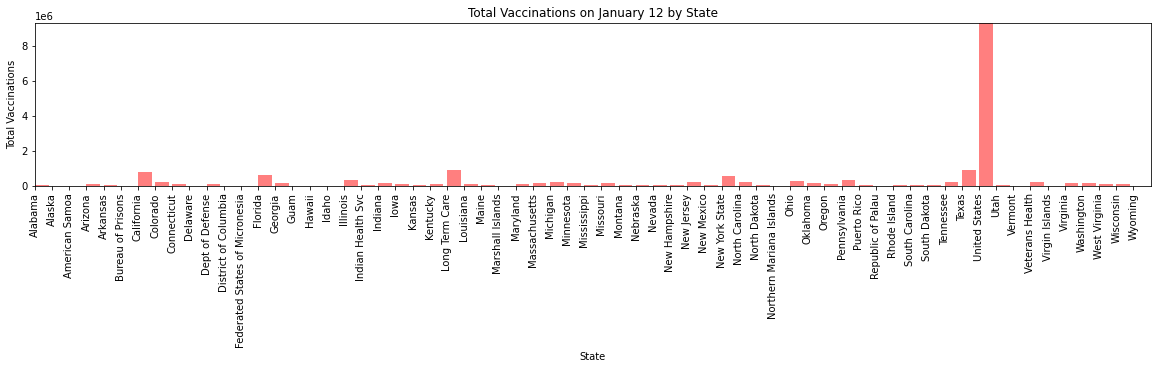

In [17]:
plt.figure(figsize=(20,3))
plt.bar(x_axis,jan_12_df ["total_vaccinations"], color='r', alpha=0.5, align="edge")
plt.xticks(x_axis, jan_12_df["location"].values, rotation="vertical")
plt.xlim(-.025, len(x_axis))
plt.ylim(0, max(jan_12_df["total_vaccinations"])+10)
plt.title("Total Vaccinations on January 12 by State")
plt.xlabel("State")
plt.ylabel("Total Vaccinations")
#plt.tight_layout()
plt.show()


In [18]:
x_axis

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])

In [19]:
jan_12_df["total_vaccinations"]

0        78134.0
46       35838.0
92        2124.0
138     141355.0
184      40879.0
          ...   
2783    190607.0
2829    195567.0
2875    103330.0
2921    137253.0
2967     16467.0
Name: total_vaccinations, Length: 65, dtype: float64

In [20]:
jan_12_df["location"].values

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'Bureau of Prisons', 'California', 'Colorado', 'Connecticut',
       'Delaware', 'Dept of Defense', 'District of Columbia',
       'Federated States of Micronesia', 'Florida', 'Georgia', 'Guam',
       'Hawaii', 'Idaho', 'Illinois', 'Indian Health Svc', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Long Term Care', 'Louisiana',
       'Maine', 'Marshall Islands', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York State', 'North Carolina', 'North Dakota',
       'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Republic of Palau', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
       'United States', 'Utah', 'Vermont', 'Veterans Health',
       'Virgin Islands', 'Virginia', 'Washington', 'West V

In [21]:
tick_locations

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64]

In [22]:
jan_19_df=no_null_total_df[(no_null_total_df["date"]=="2021-01-19")]
jan_19_df

,date,location,total_vaccinations,total_distributed
7,2021-01-19,Alabama,130795.0,444650.0
53,2021-01-19,Alaska,66331.0,150450.0
99,2021-01-19,American Samoa,4756.0,18450.0
145,2021-01-19,Arizona,266276.0,571725.0
191,2021-01-19,Arkansas,142337.0,297800.0
...,...,...,...,...
2790,2021-01-19,Virginia,326894.0,852725.0
2836,2021-01-19,Washington,321200.0,696175.0
2882,2021-01-19,West Virginia,152657.0,205475.0
2928,2021-01-19,Wisconsin,213498.0,437900.0


In [23]:
x_axis = np.arange(len(jan_19_df)) 
tick_locations = [value for value in x_axis]

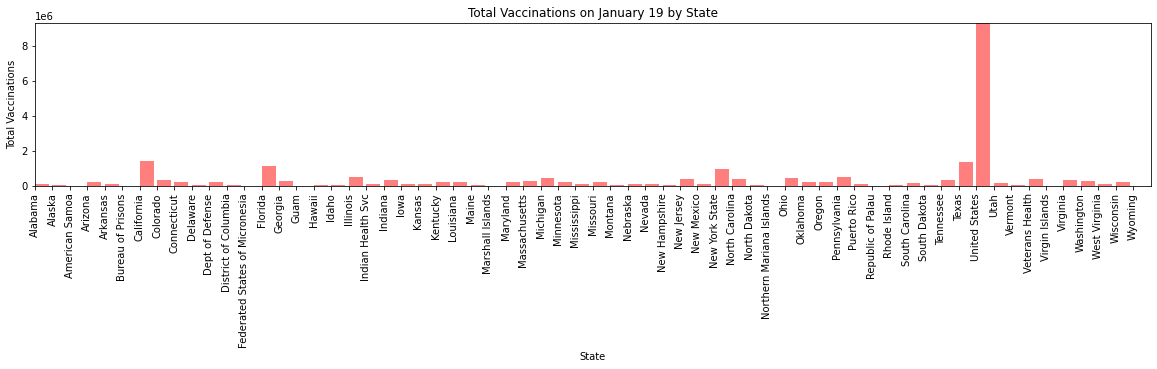

In [24]:
plt.figure(figsize=(20,3))
plt.bar(x_axis,jan_19_df ["total_vaccinations"], color='r', alpha=0.5, align="edge")
plt.xticks(x_axis, jan_19_df["location"].values, rotation="vertical")
plt.xlim(-.025, len(x_axis))
plt.ylim(0, max(jan_12_df["total_vaccinations"])+10)
plt.title("Total Vaccinations on January 19 by State")
plt.xlabel("State")
plt.ylabel("Total Vaccinations")
#plt.tight_layout()
plt.show()

In [25]:
jan_26_df=no_null_total_df[(no_null_total_df["date"]=="2021-01-26")]
jan_26_df

,date,location,total_vaccinations,total_distributed
14,2021-01-26,Alabama,254959.0,569000.0
60,2021-01-26,Alaska,98149.0,162925.0
106,2021-01-26,American Samoa,8315.0,18450.0
152,2021-01-26,Arizona,430892.0,837200.0
198,2021-01-26,Arkansas,236290.0,394775.0
...,...,...,...,...
2797,2021-01-26,Virginia,594828.0,1172375.0
2843,2021-01-26,Washington,507610.0,960800.0
2889,2021-01-26,West Virginia,210492.0,278400.0
2935,2021-01-26,Wisconsin,318096.0,685100.0


In [26]:
x_axis = np.arange(len(jan_26_df)) 
tick_locations = [value for value in x_axis]

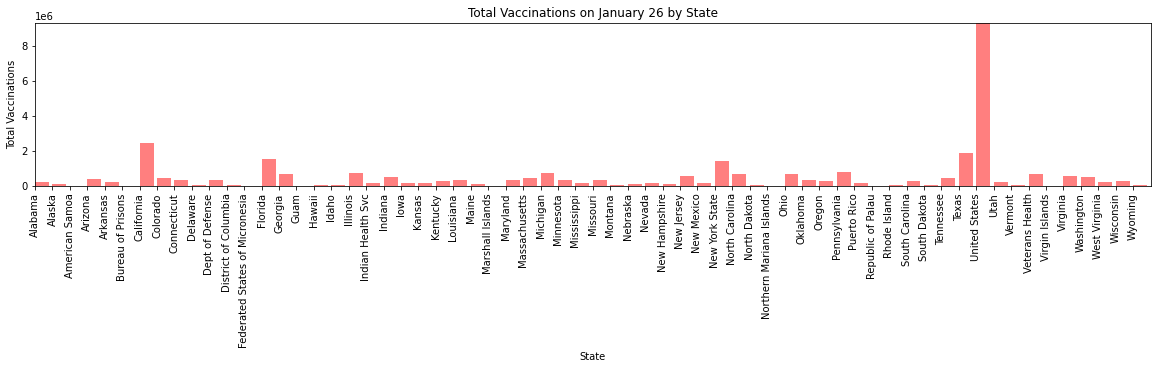

In [27]:
plt.figure(figsize=(20,3))
plt.bar(x_axis,jan_26_df ["total_vaccinations"], color='r', alpha=0.5, align="edge")
plt.xticks(x_axis, jan_26_df["location"].values, rotation="vertical")
plt.xlim(-.025, len(x_axis))
plt.ylim(0, max(jan_12_df["total_vaccinations"])+10)
plt.title("Total Vaccinations on January 26 by State")
plt.xlabel("State")
plt.ylabel("Total Vaccinations")
#plt.tight_layout()
plt.show()

In [28]:
Feb_02_df=no_null_total_df[(no_null_total_df["date"]=="2021-02-02")]
Feb_02_df

,date,location,total_vaccinations,total_distributed
21,2021-02-02,Alabama,371882.0,680550.0
67,2021-02-02,Alaska,123443.0,196975.0
113,2021-02-02,American Samoa,10761.0,18450.0
159,2021-02-02,Arizona,631662.0,1082050.0
205,2021-02-02,Arkansas,314470.0,467800.0
...,...,...,...,...
2804,2021-02-02,Virginia,901213.0,1306800.0
2850,2021-02-02,Washington,741769.0,1129025.0
2896,2021-02-02,West Virginia,264205.0,325100.0
2942,2021-02-02,Wisconsin,522034.0,900250.0


In [30]:
x_axis = np.arange(len(Feb_02_df)) 
tick_locations = [value for value in x_axis]

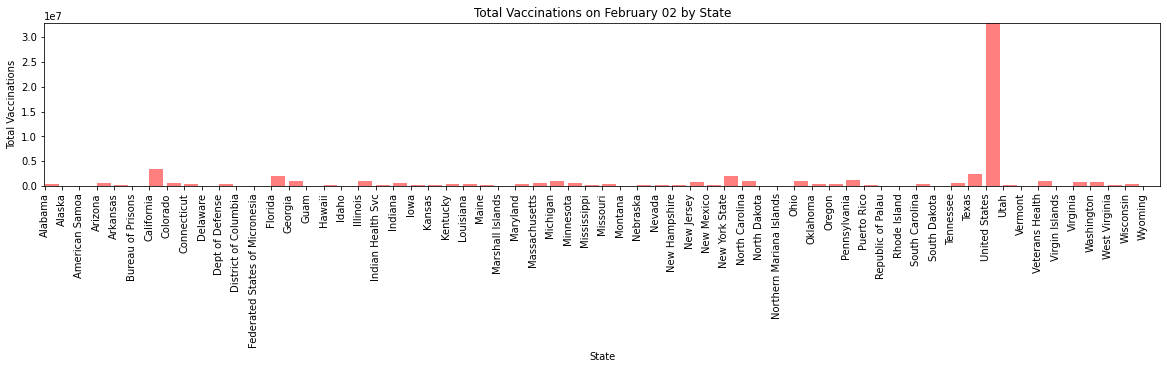

In [31]:
plt.figure(figsize=(20,3))
plt.bar(x_axis,Feb_02_df ["total_vaccinations"], color='r', alpha=0.5, align="edge")
plt.xticks(x_axis, Feb_02_df["location"].values, rotation="vertical")
plt.xlim(-.025, len(x_axis))
plt.ylim(0, max(Feb_02_df["total_vaccinations"])+10)
plt.title("Total Vaccinations on February 02 by State")
plt.xlabel("State")
plt.ylabel("Total Vaccinations")
#plt.tight_layout()
plt.show()

In [32]:
Feb_09_df=no_null_total_df[(no_null_total_df["date"]=="2021-02-09")]
Feb_09_df

,date,location,total_vaccinations,total_distributed
28,2021-02-09,Alabama,490969.0,823600.0
74,2021-02-09,Alaska,152874.0,256900.0
120,2021-02-09,American Samoa,12680.0,29450.0
166,2021-02-09,Arizona,863807.0,1265950.0
212,2021-02-09,Arkansas,404127.0,580775.0
...,...,...,...,...
2811,2021-02-09,Virginia,1161590.0,1544150.0
2857,2021-02-09,Washington,951204.0,1364750.0
2903,2021-02-09,West Virginia,327414.0,380400.0
2949,2021-02-09,Wisconsin,769314.0,1045950.0


In [33]:
x_axis = np.arange(len(Feb_09_df)) 
tick_locations = [value for value in x_axis]

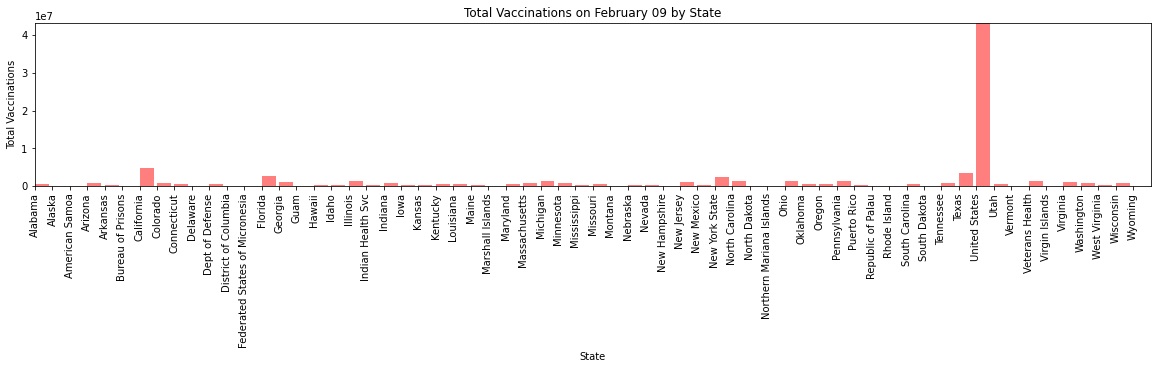

In [35]:
plt.figure(figsize=(20,3))
plt.bar(x_axis,Feb_09_df ["total_vaccinations"], color='r', alpha=0.5, align="edge")
plt.xticks(x_axis, Feb_09_df["location"].values, rotation="vertical")
plt.xlim(-.025, len(x_axis))
plt.ylim(0, max(Feb_09_df["total_vaccinations"])+10)
plt.title("Total Vaccinations on February 09 by State")
plt.xlabel("State")
plt.ylabel("Total Vaccinations")
#plt.tight_layout()
plt.show()

In [36]:
Feb_16_df=no_null_total_df[(no_null_total_df["date"]=="2021-02-16")]
Feb_16_df

,date,location,total_vaccinations,total_distributed
35,2021-02-16,Alabama,636682.0,1015775.0
81,2021-02-16,Alaska,191008.0,271550.0
127,2021-02-16,American Samoa,16109.0,29450.0
173,2021-02-16,Arizona,1154583.0,1396475.0
219,2021-02-16,Arkansas,483438.0,631675.0
...,...,...,...,...
2818,2021-02-16,Virginia,1431501.0,1648500.0
2864,2021-02-16,Washington,1201284.0,1453425.0
2910,2021-02-16,West Virginia,393643.0,429800.0
2956,2021-02-16,Wisconsin,991691.0,1223525.0


In [37]:
x_axis = np.arange(len(Feb_16_df)) 
tick_locations = [value for value in x_axis]

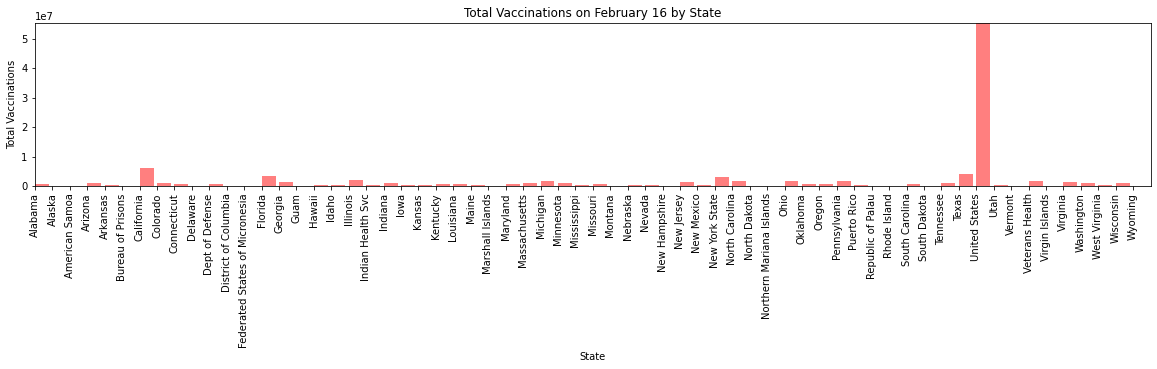

In [38]:
plt.figure(figsize=(20,3))
plt.bar(x_axis,Feb_16_df ["total_vaccinations"], color='r', alpha=0.5, align="edge")
plt.xticks(x_axis, Feb_16_df["location"].values, rotation="vertical")
plt.xlim(-.025, len(x_axis))
plt.ylim(0, max(Feb_16_df["total_vaccinations"])+10)
plt.title("Total Vaccinations on February 16 by State")
plt.xlabel("State")
plt.ylabel("Total Vaccinations")
#plt.tight_layout()
plt.show()

In [39]:
Feb_23_df=no_null_total_df[(no_null_total_df["date"]=="2021-02-23")]
Feb_23_df

,date,location,total_vaccinations,total_distributed
42,2021-02-23,Alabama,815108.0,1084440.0
88,2021-02-23,Alaska,239927.0,304875.0
134,2021-02-23,American Samoa,18816.0,29450.0
180,2021-02-23,Arizona,1525794.0,1755635.0
226,2021-02-23,Arkansas,540192.0,794230.0
...,...,...,...,...
2825,2021-02-23,Virginia,1765927.0,2283165.0
2871,2021-02-23,Washington,1493572.0,1920320.0
2917,2021-02-23,West Virginia,470643.0,512865.0
2963,2021-02-23,Wisconsin,1259647.0,1401205.0


In [40]:
x_axis = np.arange(len(Feb_23_df)) 
tick_locations = [value for value in x_axis]

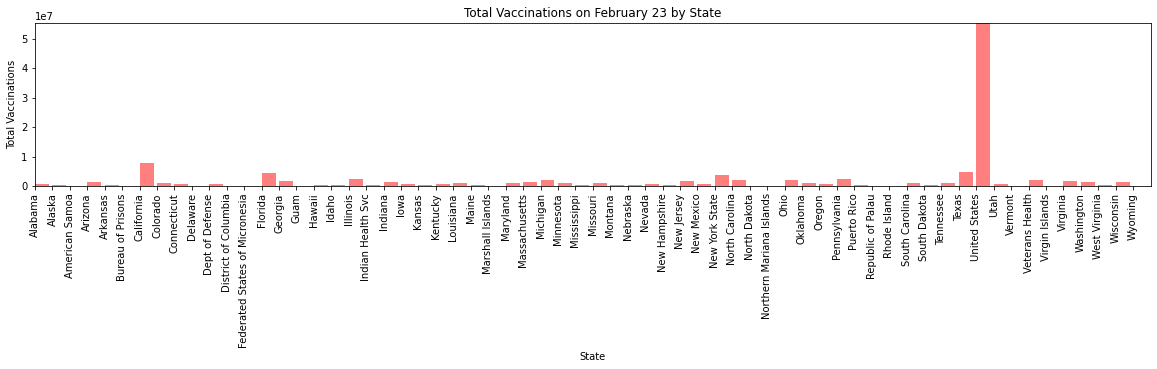

In [41]:
plt.figure(figsize=(20,3))
plt.bar(x_axis,Feb_23_df ["total_vaccinations"], color='r', alpha=0.5, align="edge")
plt.xticks(x_axis, Feb_23_df["location"].values, rotation="vertical")
plt.xlim(-.025, len(x_axis))
plt.ylim(0, max(Feb_16_df["total_vaccinations"])+10)
plt.title("Total Vaccinations on February 23 by State")
plt.xlabel("State")
plt.ylabel("Total Vaccinations")
#plt.tight_layout()
plt.show()